In [1]:
pip install fbprophet

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [12]:
import pandas as pd
import numpy as np
import fbprophet as fp
from matplotlib import pyplot

In [13]:
df = pd.read_csv("/content/gdrive/My Drive/monthly-car-sales.csv", header=0)

In [14]:
# summarize shape
print(df.shape)
# show first few rows
print(df.head())

(108, 2)
     Month  Sales
0  1960-01   6550
1  1960-02   8728
2  1960-03  12026
3  1960-04  14395
4  1960-05  14587


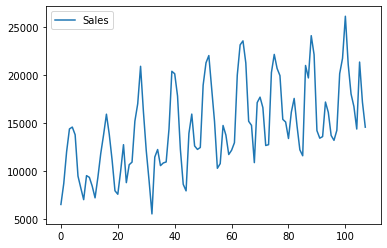

In [15]:
# plot the time series
df.plot()
pyplot.show()

In [17]:
# prepare expected column names
df.columns = ['ds', 'y']
df['ds']= pd.to_datetime(df['ds'])

In [19]:
# define the model
model = fp.Prophet()
# fit the model
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15375.960093  13850.585201  16897.498477
1 1969-02-01  16142.271673  14541.650171  17683.343026
2 1969-03-01  21351.832640  19829.754439  23025.292903
3 1969-04-01  23477.889811  21918.145863  25116.777124
4 1969-05-01  24988.440907  23274.530114  26522.302369


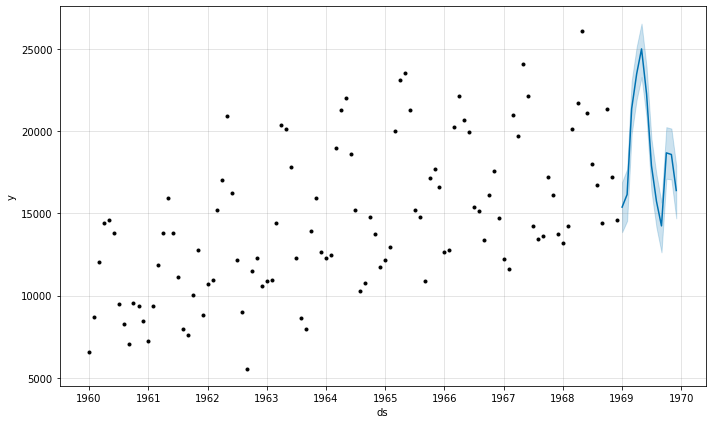

In [27]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
pyplot.show()

MAE: 1369.485


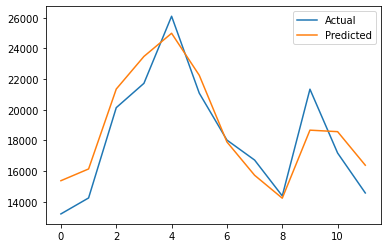

In [29]:
# calculate MAE between expected and predicted values for december
from sklearn.metrics import mean_absolute_error
y_true = df['y'][-12:].values
y_pred = forecast['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)
# plot expected vs actual
pyplot.plot(y_true, label='Actual')
pyplot.plot(y_pred, label='Predicted')
pyplot.legend()
pyplot.show()